# Classifying Presense of Angiographic Heart Disease  

### DSCI 100 004 Group 24 Proposal

## Introduction

### Background
Heart diseases are conditions that affect the heart's structure and function. They can develop into a serious stage and threaten someone’s life, so it is very important to make an early diagnosis and apply treatment as soon as possible. Heart diseases come in many different forms: coronary artery disease, heart rhythm disorders, heart valve disease, cardiomyopathy, congenital heart disease, pericardium, and heart failure. In our research, we will be analyzing coronary angiography disease which is the narrowing of blood vessels and constriction of proper blood flow.

### Question
Can we use classification to classify the presence and severity of angiographic disease in a patient based on their age, resting blood pressure, cholesterol level, maximum heart rate, and chest pain?    

### DataSet 
The dataset is collected by researchers in hospitals from Cleveland, Hungary, Long Beach California, and Switzerland. The dataset can be found here https://archive.ics.uci.edu/dataset/45/heart+disease. The dataset orignally contained 76 attributes but researchers have reduced it to 14 attributes. Them being,
- `age` 
- `sex`

        -- Value 1: Male
        -- Value 2: Female
- `cp` - chest pain type

        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
- `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
- `chol` - serum cholesterol in mg/dl
- `fbs`- (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
- `restecg` - resting electrocardiographic results

        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality 
        -- Value 2: showing probable or definite left ventricular hypertrophy

- `thalach` -maximum heart rate achieved
- `exang` - exercise induced angina (1 = yes; 0 = no)
- `oldpeak` - ST depression induced by exercise relative to rest
- `slope` - the slope of the peak exercise ST segment

        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
- `ca` - number of major vessels (0-3)
- `thal`

        -- Value 3: normal
        -- Value 6: fixed defect
        -- Value 7: reversable defect
- `num` -diagnosis of heart disease (angiographic disease status)

        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing



**Note**: The variable `num` ranges from 0-4 where 0 represents no presence of a decease, and values 1-4 indicate a presence of decease where the severity increases as the value increases.

## Preliminary Exploratory Data Analysis

### Installation

Before beginning the analysis the library `cowplot` must be installed. To install the library run the install cell below.

In [1]:
install.packages("cowplot") 

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Libraries

Next we will import the libraries `tidyverse`, `tidymodels`, `dplyr`, `repr`, and 
the previously installed `cowplot`. 

These libraries will be used to read, clean, split, summarize, and visualize the dataset. 

In [2]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

### Reading Data

The data is sourced from a UC Irvine Machine Learning Repository, found here https://archive.ics.uci.edu/dataset/45/heart+disease.

The relevant files have been add to this repository's `data` directory and pushed to GitHub. This file will read 
the data file from the GitHub URL to the raw data. 


In [3]:
# Create list of column names found in data/heart-disease.names
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

# Read in data
dataset <- read_delim("https://raw.githubusercontent.com/tamzeedq/dsci-100_group_project/main/data/processed.cleveland.data", delim = ",", col_names = column_names)
head(dataset, 5) # Preview first 5 rows

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Tidying/Cleaning the Data

Columns `ca` and `thal` are the only columns to have missing data, and since they are not relevant to our analysis we'll drop these two columns. Some column headers are also unclear, so we'll update the names that are relevant to our analysis to improve readability. Lastly, we will convert the columns representing chest pain type (`cp_type`) and presence of heart disease (`presence`) from numbers to factors. This is because they are both categorical variables that are being classified with correlated numbers; the columns don't actually represent a range of numbers.


In [4]:
updated_column_names <- c("age", "sex", "cp_type", "rest_bps", "chol", "fbs", "restecg", "max_heart_rate", "exang", "oldpeak", "slope", "ca", "thal", "presence")

colnames(dataset) <- updated_column_names # Updated the column names
updated_dataset <- dataset |>
            select(-ca, -thal) |> # Select every column except for ca and thal
            mutate(cp_type = as_factor(cp_type), presence = as_factor(presence)) # Convert column datatypes

head(updated_dataset, 5) # Preview first 5 rows

age,sex,cp_type,rest_bps,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,presence
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0
67,1,4,160,286,0,2,108,1,1.5,2,2
67,1,4,120,229,0,2,129,1,2.6,2,1
37,1,3,130,250,0,0,187,0,3.5,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0


### Split the Data

The updated dataset is split into a training set and testing set, 75% of the data will be used to create a training set while the remaining 25% will be used to create a testing dataset.


In [5]:
data_split <- initial_split(updated_dataset, prop = 0.75, strata = presence)  
training_data <- training(data_split)   
testing_data <- testing(data_split)

### Summarize the Data

We will do two things to summarize the training dataset. First, we will look at the count of rows for each category of the variable we wish to predict(`presence`). Second, we will look at the mean of the variables that we want to use to predict for `presence`: `age`, `rest_bps`, `chol`, `max_heart_rate`. 

**Note**: Although we want to use chest pain type (`cp_type`) as one of our predictor variables, it is a categorical variable therefore a mean value can not be found for it and won't be included in the mean table.  

Let's start with finding the count of different categories for our response variable.

In [6]:
presence_count <- training_data |>
                group_by(presence) |>
                summarize(count = n())
presence_count

presence,count
<fct>,<int>
0,122
1,41
2,25
3,26
4,11


Finding the means of our quantitative predictor variables.

In [7]:
variable_means <- training_data |>
summarize(mean_age=mean(age), mean_rest_bps=mean(rest_bps), mean_chol=mean(chol), mean_max_rate=mean(max_heart_rate))

variable_means

mean_age,mean_rest_bps,mean_chol,mean_max_rate
<dbl>,<dbl>,<dbl>,<dbl>
54.35111,131.3067,245.0533,149.8667


### Plotting the Data

Due to having multiple predictor variables, creating a plot with all of our predictor variables together would make for an unclear plot. So below is a scatter plot proving an example of a plot to visualize the association between 3/5 of our predictor variables. The graph compares age and cholesterol on the x and y axis, and is classified by shapes that relate to different chest pains. The different colors represent the different classifications for our response variable (`presence`).

Below the scatter plot are histograms to demonstrate the distribution of data that is being representing by our predictor variables in the training dataset.

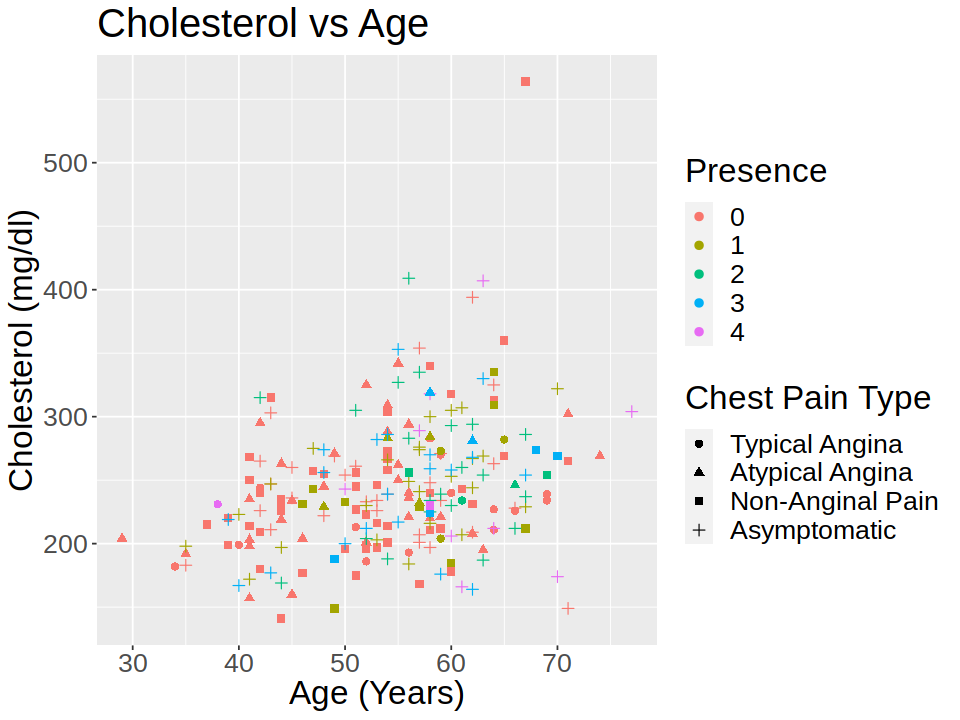

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)


chest_pain_labels <- c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")

age_chol_plot <- training_data |>
    ggplot(aes(x = age, 
               y = chol, 
               colour = presence,
               shape = factor(cp_type, labels = chest_pain_labels))) +
    labs(x = "Age (Years)",
         y = "Cholesterol (mg/dl)",
         colour = "Presence",
         shape = "Chest Pain Type") +
    geom_point(size = 2) +
    ggtitle("Cholesterol vs Age") +
    theme(text = element_text(size = 20))

age_chol_plot

Distribution histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


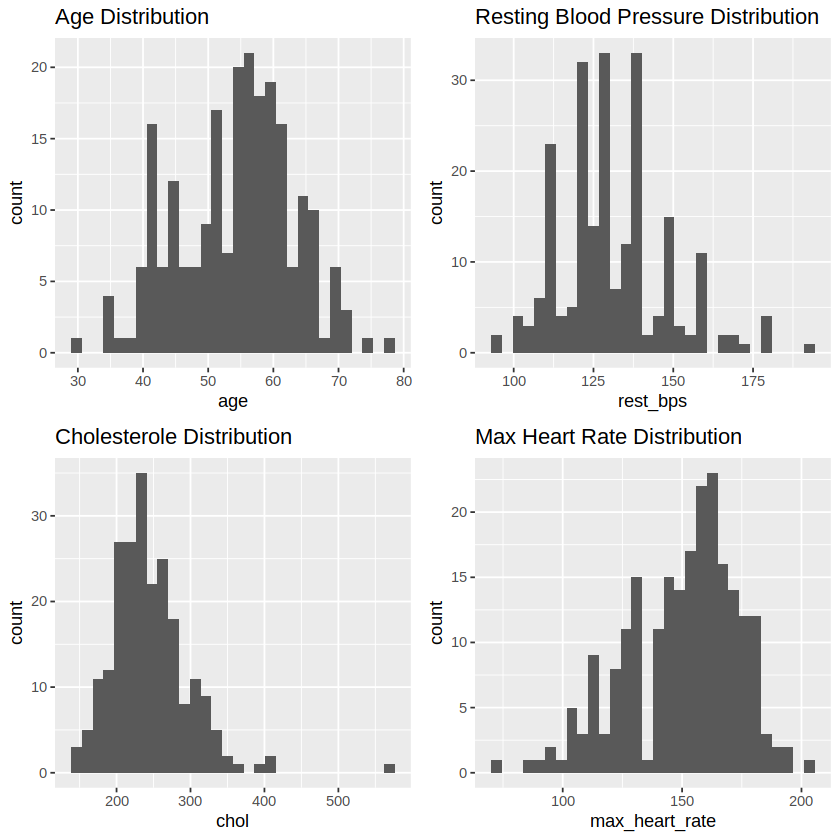

In [9]:
age_hist <- training_data |>
        ggplot(aes(x = age)) +
        geom_histogram() +
        ggtitle("Age Distribution")

bps_hist <- training_data |>
        ggplot(aes(x = rest_bps)) +
        geom_histogram() +
        ggtitle("Resting Blood Pressure Distribution")

chol_hist <- training_data |>
        ggplot(aes(x = chol)) +
        geom_histogram() + 
        ggtitle("Cholesterole Distribution")


heart_rate_hist <- training_data |>
        ggplot(aes(x = max_heart_rate)) +
        geom_histogram() + 
        ggtitle("Max Heart Rate Distribution")

options(repr.plot.width = 7, repr.plot.height = 7)
plot_grid(age_hist, bps_hist, chol_hist, heart_rate_hist, ncol = 2, nrow=2)

## Methods

We will conduct our data analysis by building a K-Nearest Neighbors classification model to predict for the presence of heart disease. We will use the variables Age, Resting Blood Pressure (mm Hg), Cholesterol (mg/dl), Max Heart Rate, and Type of Chest Pain as our predictors and predict for the `presence` variable (previously named `num`).

The data will first be tidied/cleaned, and split into a training and testing set similar to how it was done previously. The model will then be trained on the training set and we will perform tuning and cross validation to find an optimal number of neighbors to ensure the best accuracy. 


This model will be visualized using multiple 2D scatter plots to visualize relationships between each of the predictors. Whether or not a point is affected by heart disease will be colored differently to distinctly classify the observation.

## Expected Outcomes and Significance

We expect to find a relationship between age, cholesterol, heart rate, blood pressure, and chest pain which we can use to accurately classify the risk of heart disease. We hope that our model and analysis could be used by medical professionals in hospitals and clinics to aid in their diagnostics and patient care.

Our analysis can potentially lead to further questions such as what other types of heart diseases could be classified using similar predictors? Moreover, how can we use these variables to establish health norm ranges for optimal cardiovascular health? For example, asserting that at a specific age, one should try to be below a certain cholesterol level or blood pressure.   
